In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
f = open("diagnose.txt", "r")
diagnose_data =f.read()
diagnose_data = re.findall("\d\.\d+",diagnose_data)
for i in range(len(diagnose_data)): diagnose_data[i]=float(diagnose_data[i])
diagnose_data = np.asarray(diagnose_data)
print(diagnose_data.shape)

(200000,)


In [3]:
f = open('infection.txt', "r")
infection_data =f.read()
infection_data = re.findall("\d\.\d+",infection_data)
for i in range(len(infection_data)): infection_data[i]=float(infection_data[i])
infection_data = np.asarray(infection_data)
print(infection_data.shape)

(199999,)


# Plot the two infection and diagnose data

In [4]:
delay_t = abs(diagnose_data[1:] - infection_data)
hist, bin_edges = np.histogram(delay_t)
print(infection_data)

[0.       0.       0.       ... 5.117907 0.306942 1.205853]


Text(0, 0.5, 'Frequency')

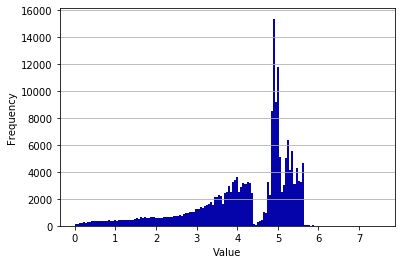

In [13]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=delay_t, bins='auto', color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
#maxfreq = n.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [14]:
def test_function(infection, diagnosis, alpha):
    min_len = min(len(infection), len(diagnosis))
    infection = infection[0: min_len]
    diagnosis = diagnosis[0: min_len]
    alpha = np.concatenate((alpha, np.ones((min_len-len(alpha),)).astype(float)))
    infection_change = infection.copy()
    infection_change[1:] = infection[1:] - infection[:-1]
    predicted_diagnosis = np.zeros(diagnosis.shape)
    for i in range(len(diagnosis)):
        try:
            predicted_diagnosis[i] = np.sum(infection_change[i:: -1] * alpha[0: i + 1])
        except:
            break
    plt.plot(diagnosis)
    plt.plot(predicted_diagnosis)
    plt.plot(infection)
    plt.legend(['diagnosis', 'perdicted_diagnosis', 'infection'])
    plt.savefig('plot.png')
    return predicted_diagnosis
    print(diagnosis, predicted_diagnosis)

In [15]:
alpha = np.load(alpha.npy)
#test_function(infection_data, diagnose_data, alpha)

AttributeError: 'numpy.ndarray' object has no attribute 'npy'

# line and curve fitting

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def test_function(infection, diagnosis, alpha):
    min_len = min(len(infection), len(diagnosis))
    infection = infection[0: min_len]
    diagnosis = diagnosis[0: min_len]
    alpha = np.concatenate((alpha, np.ones((min_len - len(alpha),)).astype(float)))
    infection_change = infection.copy()
    infection_change[1:] = infection[1:] - infection[:-1]
    predicted_diagnosis = np.zeros(diagnosis.shape)
    for i in range(len(diagnosis)):
        try:
            predicted_diagnosis[i] = np.sum(infection_change[i:: -1] * alpha[0: i + 1])
        except:
            break
    plt.plot(diagnosis)
    plt.plot(predicted_diagnosis)
    plt.plot(infection)
    plt.legend(['diagnosis', 'perdicted_diagnosis', 'infection'])
    plt.savefig('plot5.png')
    return predicted_diagnosis
    # print(diagnosis, predicted_diagnosis)


def test_G_0_known(G0, diagnosis, alpha, infection, diagonsis_tmp):
    max_number = 500
    min_len = min(len(infection), len(diagnosis))
    diagnosis = diagnosis[0: min_len]
    # diagnosis = diagnosis[::10]
    if len(alpha) < min_len:
        alpha = np.concatenate((alpha, np.ones((min_len - len(alpha),)).astype(float)))
    # alpha = alpha[::10]
    # infection = infection[::10]
    # min_len = len(diagnosis)
    alpha_diff = alpha.copy()
    alpha_diff[1:] = alpha[1:] - alpha[:-1]
    infection_pred = np.zeros(diagnosis.shape)
    infection_pred[0] = G0
    for i in range(1, min_len):
        tmp = diagnosis[i] - alpha[i] * G0
        for j in range(1, i):
            tmp -= alpha[i - j] * (infection_pred[j] - infection_pred[j - 1])
        # infection_pred[i] = min(max(float(tmp) / alpha[0] + infection_pred[i - 1], infection_pred[i-1]), max_number)
        # infection_pred[i] = min(float(tmp) / alpha[0] + infection_pred[i - 1], max_number)
        infection_pred[i] = float(tmp) / alpha[0] + infection_pred[i - 1]
        # infection_pred[i] = float(tmp) / alpha[0] + infection_pred[i - 1]
    # for i in range(0, len(infection_pred), 50):
    #     infection_pred[i * 50: i * 50 + 50] = infection_pred[i * 50: i * 50 + 50].mean()
    plt.plot(diagnosis)
    plt.plot(infection_pred)
    plt.plot(infection)
    plt.plot(diagonsis_tmp)
    # plt.legend(['polynomial fitting diagnosis', 'approximated infection', 'infection', 'diagnosis'])
    plt.legend(['approximated infection', 'infection', 'diagnosis'])
    # plt.legend(['diagnosis', 'infection'])
    plt.savefig('o3.png')
    return infection_pred

idx = 2555
r = 500
degree = 12
infection = np.load('infection.npy')
diagnosis = np.load('diagnosis.npy')
alpha = np.load('alpha.npy')
error = 0
s = 0
end = 5
diagnosis_tmp = diagnosis[idx, :r].copy()


infection_appr = test_G_0_known(np.array(infection[idx, s]), np.array(diagnosis_appr[s: - end]), 
                                np.array(alpha), infection[idx, s: r - end], diagnosis_tmp[s: -end])
start = 0


NameError: name 'diagnosis_appr' is not defined

(500,)


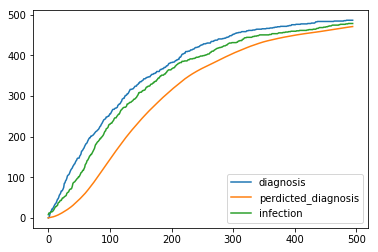

In [219]:
idx = 4000
diagnosis_appr = test_function(infection[idx, s: r - end],np.array(diagnosis_tmp[s: - end]), np.array(alpha))
print(infection[idx,:r].shape)

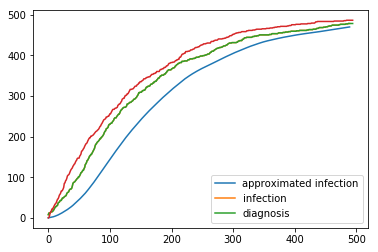

In [198]:
infection_appr = test_G_0_known(np.array(infection[idx, s]), np.array(diagnosis_appr[s: - end]), 
                                np.array(alpha), infection[idx, s: r - end], diagnosis_tmp[s: -end])

# 1.gaussion line fitting


N:     472.90 +/- 2.329
mu:    398.93 +/- 2.717
sigma: 194.74 +/- 2.516


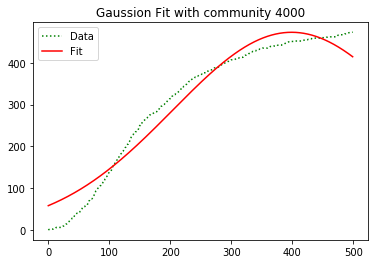

In [84]:
from pylab import *
ion()
import fit
from numpy import random, exp, arange
random.seed(0)


idx = 4000
# Create some data to fit
x = arange(0, 500, 1)
# A gaussian of height 10, width 2, centered at zero. With noise.
y = diagnosis[idx, :r]


# No need to provide first guess at parameters for fit.gaus
(xf, yf), params, err, chi = fit.fit(fit.gaus, x,y)

print("N:     %.2f +/- %.3f" % (params[0], err[0]))
print("mu:    %.2f +/- %.3f" % (params[1], err[1]))
print("sigma: %.2f +/- %.3f" % (params[2], err[2]))

#plt.title('Polynomial Fit with Matplotlib')
plt.title('Gaussion Fit with community 4000')
plot(x,y, 'g:', label='Data')
plot(xf, yf, 'r-', label='Fit')
legend()

N:     452.76 +/- 1.861
mu:    408.58 +/- 2.304
sigma: 189.48 +/- 2.043


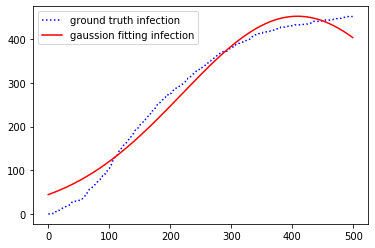

In [82]:
idx = 1000



# Create some data to fit
x = arange(0, 500, 1)
# A gaussian of height 10, width 2, centered at zero. With noise.
y = diagnosis[idx, :r]


# No need to provide first guess at parameters for fit.gaus
(xf, yf), params, err, chi = fit.fit(fit.gaus, x,y)

print("N:     %.2f +/- %.3f" % (params[0], err[0]))
print("mu:    %.2f +/- %.3f" % (params[1], err[1]))
print("sigma: %.2f +/- %.3f" % (params[2], err[2]))

plot(x,y, 'b:', label='ground truth infection')
plot(xf, yf, 'r-', label='gaussion fitting infection')
legend()


N:     486.98 +/- 1.493
mu:    403.36 +/- 2.689
sigma: 249.18 +/- 2.598


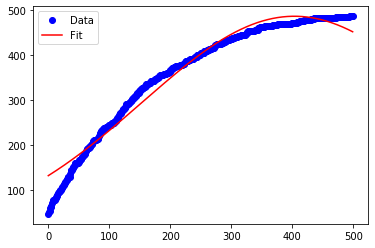

In [65]:
idx = 10



# Create some data to fit
x = arange(0, 500, 1)
# A gaussian of height 10, width 2, centered at zero. With noise.
y = infection[idx, :r]


# No need to provide first guess at parameters for fit.gaus
(xf, yf), params, err, chi = fit.fit(fit.gaus, x,y)

print("N:     %.2f +/- %.3f" % (params[0], err[0]))
print("mu:    %.2f +/- %.3f" % (params[1], err[1]))
print("sigma: %.2f +/- %.3f" % (params[2], err[2]))

plot(x,y, 'bo', label='Data')
plot(xf, yf, 'r-', label='Fit')
legend()


# 2.crystal_ball etimation

N:     2.60 +/- nan
mu:    -0.15 +/- nan


/Users/songjiechen/Desktop/HIV_infections_prediction-derivative-method/fit.py:145: RuntimeWarning: divide by zero encountered in power
  return base*(x**exponent)


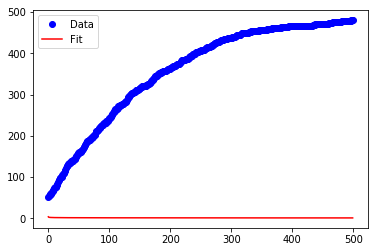

In [243]:
# idx = 1000



# Create some data to fit
x = arange(0, 500, 1)
# A gaussian of height 10, width 2, centered at zero. With noise.
y = infection[idx, :r]


# No need to provide first guess at parameters for fit.gaus
(xf, yf), params, err, chi = fit.fit(fit.pow_law, x,y)

print("N:     %.2f +/- %.3f" % (params[0], err[0]))
print("mu:    %.2f +/- %.3f" % (params[1], err[1]))
#print("sigma: %.2f +/- %.3f" % (params[2], err[2]))

plot(x,y, 'bo', label='Data')
plot(xf, yf, 'r-', label='Fit')
legend()


# 3. Polynominal fitting with the infection data

           3           2
5.342e-06 x - 0.00678 x + 3.052 x - 18.15
           2
1.602e-05 x - 0.01356 x + 3.052


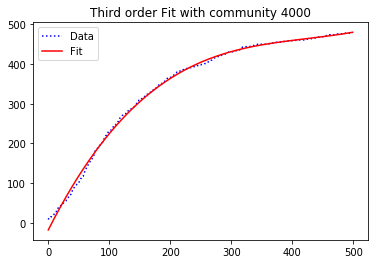

In [78]:
idx = 4000

# Create some data to fit
x = arange(0, 500, 1)
# A gaussian of height 10, width 2, centered at zero. With noise.
y = infection[idx, :r]


# No need to provide first guess at parameters for fit.gaus
coeffs = np.polyfit(x, y, 3)
ffit = np.poly1d(coeffs)
fderiv = ffit.deriv()

# The predicted y 
y_pred = ffit(x)
print(ffit)
print(fderiv)
plt.title('Third order Fit with community 4000')
plot(x,y, 'b:', label='Data')
plot(x, y_pred, 'r-', label='Fit')
legend()


           2
-0.002556 x + 2.287 x - 49.18
 
-0.005113 x + 2.287


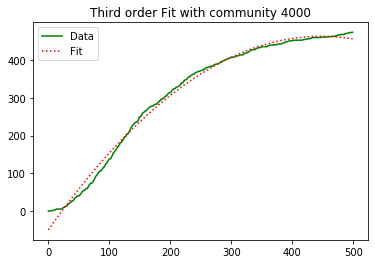

In [91]:
idx = 4000

# Create some data to fit
x = arange(0, 500, 1)
# A gaussian of height 10, width 2, centered at zero. With noise.
y = diagnosis[idx, :r]

# No need to provide first guess at parameters for fit.gaus
coeffs = np.polyfit(x, y, 2)
ffit = np.poly1d(coeffs)
fderiv = ffit.deriv()

# The predicted y 
y_pred = ffit(x)
print(ffit)
print(fderiv)
plt.title('Third order Fit with community 4000')
plot(x,y, 'g-', label='Data')
plot(x, y_pred, 'r:', label='Fit')
legend()


# only partial data exist

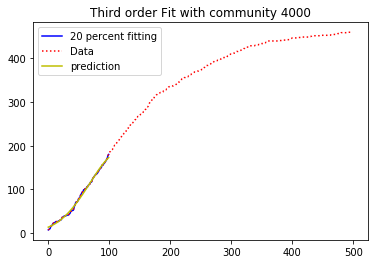

In [97]:
# fitting with 20 % of the data
idx = 1000

start = 0
end = 100
# Create some data to fit
x = arange(0, 500, 1)
# A gaussian of height 10, width 2, centered at zero. With noise.
y = infection[idx, :r]

x_p20 = arange(0, 100, 1)
y_p20 = infection[idx, start: end]

# No need to provide first guess at parameters for fit.gaus
coeffs = np.polyfit(x_p20, y_p20, 2)
ffit = np.poly1d(coeffs)
fderiv = ffit.deriv()

# The predicted y 
(xf, yf), params, err, chi = fit.fit(fit.gaus, x_p20,y_p20)

# Plotting
plt.title('Third order Fit with community 4000')
plot(x_p20,y_p20, 'b-', label='20 percent fitting')
plot(x, y, 'r:', label='Data')
plot(xf,yf, 'y-', label='prediction')

legend()



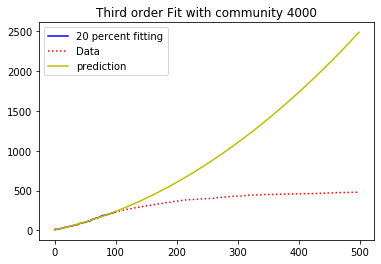

In [98]:
# fitting with 20 % of the data
idx = 4000

start = 0
end = 100
# Create some data to fit
x = arange(0, 500, 1)
# A gaussian of height 10, width 2, centered at zero. With noise.
y = infection[idx, :r]

x_p20 = arange(0, 100, 1)
y_p20 = infection[idx, start: end]

# No need to provide first guess at parameters for fit.gaus
coeffs = np.polyfit(x_p20, y_p20, 2)
ffit = np.poly1d(coeffs)
fderiv = ffit.deriv()

# The predicted y 
y_pred = ffit(x)

# Plotting
plt.title('Third order Fit with community 4000')
plot(x_p20,y_p20, 'b-', label='20 percent fitting')
plot(x, y, 'r:', label='Data')
plot(x,y_pred, 'y-', label='prediction')

legend()





            3            2
-2.775e-05 x + 0.007672 x + 1.262 x + 2.443


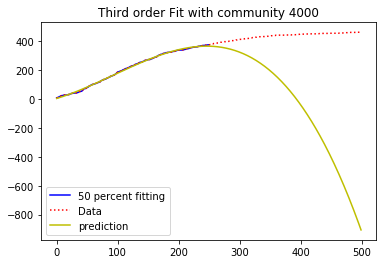

In [106]:
# fitting with 50 % of the data
"""
50 %
"""

idx = 1000

start = 0
end = 250
# Create some data to fit
x = arange(0, 500, 1)
# A gaussian of height 10, width 2, centered at zero. With noise.
y = infection[idx, :r]

x_p20 = arange(start, end, 1)
y_p20 = infection[idx, start: end]

# No need to provide first guess at parameters for fit.gaus
coeffs = np.polyfit(x_p20, y_p20, 3)
ffit = np.poly1d(coeffs)
fderiv = ffit.deriv()

# The predicted y 
y_pred = ffit(x)

# Plotting
plt.title('Third order Fit with community 4000')
plot(x_p20,y_p20, 'b-', label='50 percent fitting')
plot(x, y, 'r:', label='Data')
plot(x,y_pred, 'y-', label='prediction')

legend()
print(ffit)




            3            2
-3.235e-06 x - 0.001395 x + 2.137 x - 14.43


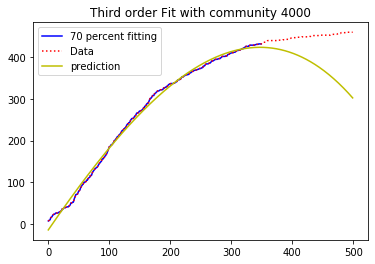

In [114]:
# fitting with 50 % of the data
"""
70 %
"""

idx = 1000

start = 0
end = 350
# Create some data to fit
x = arange(0, 500, 1)
# A gaussian of height 10, width 2, centered at zero. With noise.
y = infection[idx, :r]

x_p20 = arange(start, end, 1)
y_p20 = infection[idx, start: end]

# No need to provide first guess at parameters for fit.gaus
coeffs = np.polyfit(x_p20, y_p20, 3)
ffit = np.poly1d(coeffs)
fderiv = ffit.deriv()

# The predicted y 
y_pred = ffit(x)

# Plotting
plt.title('Third order Fit with community 4000')
plot(x_p20,y_p20, 'b-', label='70 percent fitting')
plot(x, y, 'r:', label='Data')
plot(x,y_pred, 'y-', label='prediction')

legend()
print(ffit)


